1. Wycinka lasu/okradanie domów


In [ ]:
def thief(a, n):
    F = [0 for _ in range(n)]
    F[0] = a[0]
    if n > 2:
        F[1] = max(a[0], a[1])  # type: ignore
        for i in range(2, n):
            F[i] = max(F[i-1], F[i-2]+a[i])

    return F


a = [5, 5, 10, 100, 10, 5]
# a = [1, 2, 3]
# a = [2]
n = len(a)


def check(a, n):
    F = thief(a, n)
    print(a)
    print(F)
    print("max possible sum is: ", F[n-1])


check(a, n)

2. Spadające klocki.

Mamy serię klocków reprezentowanych jako przedziały: $[a_1,b_1],[a_2,b_2],..., [a_{n-1},b_{n-1}]$

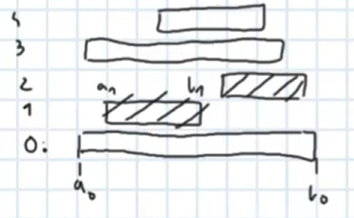

Ile minimalnie należy usunąć klocków, aby kolejne, które zostaną, miały następującą własność: gdy spadają klocki w kolejności to obecnie spadający klocek w całości mieści się na poprzednim.

Rozwiązanie:

Znaleźć $\text{LIS}$

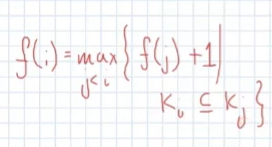


In [ ]:
def contains(a, b):
    x1, y1 = a
    x2, y2 = b
    if x2 >= x1 and y2 <= y1:
        return True
    return False


def blocks(A):
    n = len(A)
    F = [1 for _ in range(n)]
    sol=0
    for i in range(n):
        for j in range(i):
            if contains(A[j],A[i]):
                F[i]=max(F[j]+1,F[i])
        sol=max(sol,F[i])
        
    return n-sol

A=[(0,10),(11,12),(3,7),(5,9),(4,6)]
A=[(1,2),(4,12)]

blocks(A)
    

3. Żaba Monika

Na pozycji $0$ siedzi żaba, w niektórych miejscach przed nią są przekąski o różniej wartości energii. Żaba zjadając przekąskę może zyskać energię i wykorzystać ją na skok. Każde przeskoczone pole kosztuje ją kwadrat odległości energii.

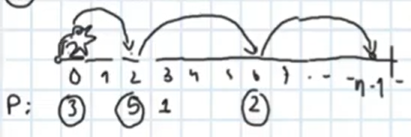

Jaka jest minimalna skoków, którą powinna wykonać żaba, żeby dostać się na ostatnie pole?

Rozwiązanie:

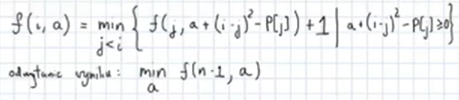


In [2]:
from math import inf


def frog(P):
    n=len(P)
    F=[[inf for _ in range(n*n+1)] for _ in range(n)]
    
    F[0][0]=0
    
    def f(F,P,i,a):
        
        if a>len(P)*len(P):
            return inf
        
        if F[i][a]!=inf:
            return F[i][a]
        
        
        res=inf
        for j in range(i):
            if a+pow((i-j),2)-P[j]>=0:
                res=min(res,f(F,P,j,a+pow((i-j),2)-P[j])+1)
        
        F[i][a]=res
        
        return F[i][a]
    
    sol=inf
    for a in range(n*n,-1,-1):
        sol=min(sol,f(F,P,n-1,a))
    
    return sol if sol!=inf else -1
        
P=[1,4,0,0,0,0]
P=[1,4,0,4,16,0,0,0,0]

frog(P)
        

4

4. Ładowanie promu.

Mamy prom, który ma dwa pokłady. Dolny ma długość $L$, a górny $L$. Przed promem stoi kolejka samochodów, które chcą wjechać na prom. Samochody muszą na niego wjeżdzać po kolei, każdy z nich ma do wyboru górny albo dolny pokład. O długości samochodów informuje nas tablica $T$, gdzie $T[0]$, to długość pierwszego samochodu w kolejce. Samochodów nie można pomijać.

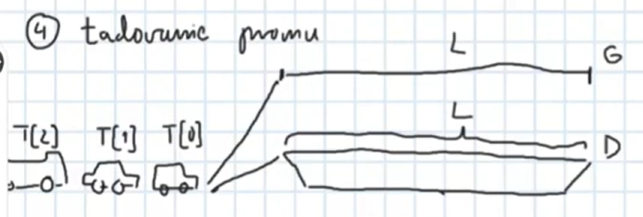

Ile samochodów może maksymalnie wjechać na prom?


In [ ]:
def load(T, L):
    n = len(T)
    F = [[[-1 for _ in range(L+1)] for _ in range(L+1)] for _ in range(n+1)]

    def f(F, T, G, D, i):

        if i == len(P):
            return 0

        if G < T[i] and D < T[i]:
            F[i][G][D] = 0
            return 0

        if F[i][G][D] != -1:
            return F[i][G][D]

        if T[i] > G:
            F[i][G][D] = f(F, T, G, D-T[i], i+1)+1
            return F[i][G][D]
        elif T[i] > D:
            F[i][G][D] = f(F, T, G-T[i], D, i+1)+1
            return F[i][G][D]
        else:
            F[i][G][D] = max(f(F, T, G-T[i], D, i+1),
                             f(F, T, G, D-T[i], i+1),)+1
            return F[i][G][D]

    return f(F, T, L, L, 0)


T = [5, 6, 1, 3, 2, 4, 3, 5]
L = 10

load(T, L)

5. Najlepsza ścieżka w drzewie

Mamy dane drzewo ważone:

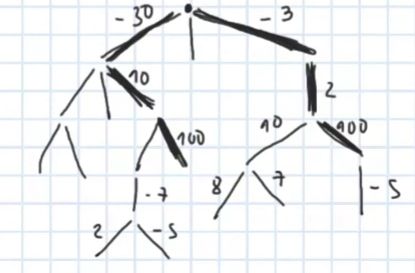

Należy znaleźć taką ścieżkę, że suma wag na krawędziach jest maksymalna.


In [ ]:
def tree(G):
    from math import inf
    sol = [-inf, -1, -1]
    n = len(G)
    parent = [-1 for _ in range(n)]
    visited = [False for _ in range(n)]

    def choose_two(two_path, new_path):

        if two_path[0][0] > two_path[1][0] and two_path[1][0] < new_path[0]:
            two_path[1][0] = new_path[0]
            two_path[1][1] = new_path[1]
        elif two_path[0][0] < new_path[0]:
            two_path[0][0] = new_path[0]
            two_path[0][1] = new_path[1]

    def dfs(G, parent, v):
        nonlocal sol
        two_path = [[0, -1], [0, -1]]
        visited[v] = True
        for u, w in G[v]:
            if not visited[u]:
                parent[u] = v
                path, leaf = dfs(G, parent, u)
                new_path = [path+w, leaf]
                choose_two(two_path, new_path)

        if sol[0] < two_path[0][0]+two_path[1][0]:
            sol[0] = two_path[0][0]+two_path[1][0]
            sol[1] = two_path[0][1]
            sol[2] = two_path[1][1]

        curr_max = [0, v]
        if curr_max[0] < two_path[0][0]:
            curr_max[0] = two_path[0][0]
            curr_max[1] = two_path[0][1]
        elif curr_max[0] < two_path[1][0]:
            curr_max[0] = two_path[1][0]
            curr_max[1] = two_path[1][1]

        return curr_max
    
    dfs(G, parent, 0)

    def get_path(sol, parent):
        path_1 = []
        path_2 = []
        leaf_1 = sol[1]
        leaf_2 = sol[2]
        while parent[leaf_1] != -1 and leaf_1!=-1:
            path_1.append(leaf_1)
            leaf_1 = parent[leaf_1]
        if path_1:
            path_1.append(leaf_1)
        while parent[leaf_2] != -1 and leaf_2!=-1:
            path_2.append(leaf_2)
            leaf_2 = parent[leaf_2]
        path_2.reverse()
        path_1 += path_2

        return path_1

    path = get_path(sol, parent)

    return sol[0], path


G = [[(1, -3), (8, 2), (9, -30)],
     [(0, -3), (2, 2)],
     [(1, 2), (3, 100), (5, 10)],
     [(2, 100), (4, -5)],
     [(3, -5)],
     [(2, 10), (6, 7), (7, 8)],
     [(7, 5)],
     [(5, 8)],
     [(0, 2)],
     [(0, -30), (10, 10)],
     [(9, 10), (11, 100)],
     [(10, 100), (12, -100)],
     [(11, -100), (13, -7)],
     [(12, -7), (14, 5), (15, 2)],
     [(13, 5)],
     [(13, 2)]
     ]

G=[
    [(1,2),(2,-1)],
    [(0,2)],
    [(0,-1)]
]

G=[
    [(1,-2),(2,-1)],
    [(0,-2)],
    [(0,-1)]
]

tree(G)

6. Sklejanie odcinków

Mamy zadane odcinki jako przedziały. Dwa odcinki wolno skleić tylko wtedy, jeśli mają dokładnie jeden punkt wspólny.

- Czy da się uzyskać odcinek $AB$ przez sklejanie niektórych odcinków?
- j.w., ale sklejając najwyżej $k$ odcinków.
- j.w., ale każdy odcinek ma dodatnią cenę i minimalizujemy sumę cen użytych odcinków.
- obliczyć jaki najdłuższy odcinek można uzyskać sklejając najwyżej $k$ odcinków.

Rozwiązanie:

- tworzymy graf skierowany (od początku do końca przedziału), gdzie końce przedziałow to wierzchołki, a krawędź istnieje, jeśli mają wspólny punkt.
- 1.  - czy istnieje ścieżka w grafie z $A$ do $B$
- 2.  - BFS i sprawdzamy długość ścieżki czy spełnia kryteria
- 3.  - algorytm dijkstry $O(ElogV)$ lub dynamiczny $O(E)$
- 4.  - algorytm dynamiczny


In [ ]:
def get_graph(S, a, b):
    G = [[] for _ in range(b-a+1)]
    
    for x, y in S:
        if x >= a and y <= b:
            G[x-a].append(y-a)
    return G


def sections(S, a, b):

    G = get_graph(S, a, b)

    def bfs(G, a, b):
        from collections import deque
        n = len(G)
        visited = [False for _ in range(n)]
        parent = [-1 for _ in range(n)]
        visited[0] = True
        Q = deque()
        Q.append(0)
        path = []
        while Q:
            u = Q.popleft()
            for v in G[u]:
                if not visited[v]:
                    visited[v] = True
                    parent[v] = u
                    Q.append(v)
                if v == b-a:
                    while parent[v] != -1:
                        path.append(v+a)
                        v = parent[v]
                    path.append(v+a)
                    return path

        return path

    path = bfs(G, a, b)

    if path:
        return path
    return -1


a, b = 1, 6
S = [(1, 2), (4, 5), (2, 3), (6, 8), (12, 13), (3, 4), (4, 6), (1, 5), (5, 10)]

sections(S, a, b)

In [4]:
def get_graph(S, a, b):
    G = [[] for _ in range(b-a+1)]

    for x, y in S:
        if x >= a and y <= b:
            G[x-a].append(y-a)
    return G


def ksections(S, a, b, k):

    G = get_graph(S, a, b)

    def bfs(G, a, b):
        from collections import deque
        n = len(G)
        visited = [False for _ in range(n)]
        parent = [-1 for _ in range(n)]
        d = [0 for _ in range(n)]
        visited[0] = True
        Q = deque()
        Q.append(0)
        path = []
        while Q:
            u = Q.popleft()
            for v in G[u]:
                if not visited[v]:
                    visited[v] = True
                    parent[v] = u
                    d[v] = d[u]+1
                    Q.append(v)
                if v == b-a:
                    if d[v] <= k:
                        while parent[v] != -1:
                            path.append(v+a)
                            v = parent[v]
                        path.append(v+a)
                    return path

        return path

    path = bfs(G, a, b)

    if path:
        return path
    return -1


a, b = 1, 6
S = [(1, 2), (4, 5), (2, 3), (6, 8), (12, 13), (3, 4), (4, 6), (1, 5), (5, 10)]
k = 3

a, b = 1, 6
# S = [(1, 2), (4, 5), (2, 3), (6, 8), (12, 13),
    #  (3, 4), (4, 6), (1, 5), (5, 10), (5, 6)]
k = 4


ksections(S, a, b, k)

[6, 4, 3, 2, 1]

In [205]:
def k_cheapest_path(S, a, b, k):
    from math import inf

    F = [[inf for _ in range(k+1)] for _ in range(b-a+1)]
    parent = [-1 for _ in range(b-a+1)]
    F[0][0] = 0

    for s in range(1, k+1):
        for x, y, c in S:
            if x >= a and y <= b and F[x-a][s-1] != inf:
                if F[y-a][s] > F[x-a][s-1]+c:
                    F[y-a][s] = F[x-a][s-1]+c
                    parent[y-a] = x-a

    sol = inf

    for s in range(k+1):
        sol = min(sol, F[b-a][s])

    path = []
    if sol != inf:
        v = b-a
        while parent[v] != -1:
            path.append(v+1)
            v = parent[v]
        path.append(v+1)
    if path:
        return path, sol
    return -1


a, b = 1, 6
S = [(1, 2, 4), (4, 5, 1), (2, 3, 2), (6, 8, 4), (12, 13, 0),
     (3, 4, 5), (4, 6, 2), (1, 5, 1), (5, 10, 4), (5, 6, 22)]
k = 4

k_cheapest_path(S, a, b, k)

([6, 4, 3, 2, 1], 13)

In [1]:
def glue(A, B):
    if A[0] == B[1]:
        return (B[0], A[1])
    if B[0] == A[1]:
        return (A[0], B[1])

    return (0, 0)


def sec_len(A):
    return A[1]-A[0]


def k_longest_section(S, k):
    n = len(S)
    F = [[(-1, -1) for _ in range(k+1)] for _ in range(n)]

    def f(F, S, i, k):

        if k-1 > i:
            F[i][k] = (0, 0)
            return (0, 0)

        if k == 1:
            F[i][k] = S[i]
            return S[i]

        if F[i][k] != (-1, -1):
            return F[i][k]

        res = (0, 0)
        for j in range(i):
            if sec_len(res) < sec_len(glue(f(F, S, j, k-1), S[i])):
                res = glue(F[j][k-1], S[i])

        return F[i][k]

    for i in range(n):
        f(F, S, i, k)

    for i in F:
        print(i)


S = [(3, 8), (2, 4), (5, 6), (4, 5)]
k = 3

k_longest_section(S, k)

[(-1, -1), (3, 8), (0, 0), (0, 0)]
[(-1, -1), (2, 4), (-1, -1), (0, 0)]
[(-1, -1), (-1, -1), (-1, -1), (-1, -1)]
[(-1, -1), (-1, -1), (-1, -1), (-1, -1)]
